In [1]:
# Проверка окружения
import sys
print("Python:", sys.version)
print("Исполняемый:", sys.executable)
print()

# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Настройки визуализации и pandas
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print("Библиотеки загружены")
print(f"pandas {pd.__version__}, seaborn {sns.__version__}, numpy {np.__version__}")

Python: 3.14.0 (v3.14.0:ebf955df7a8, Oct  7 2025, 08:20:14) [Clang 16.0.0 (clang-1600.0.26.6)]
Исполняемый: /Library/Frameworks/Python.framework/Versions/3.14/bin/python3.14

Библиотеки загружены
pandas 2.3.3, seaborn 0.13.2, numpy 2.4.0


In [2]:
# Загрузка данных
import pandas as pd
import numpy as np
import os
import gzip

print("Загружаю данные...")

data_dir = "data"
gz_file = "accepted_2007_to_2018Q4.csv.gz"
gz_path = os.path.join(data_dir, gz_file)

print(f"Файл: {gz_file}")
print(f"Размер: {os.path.getsize(gz_path) / (1024**3):.2f} GB")

# Читаем первые 100k строк для скорости
print("\nЧитаю первые 100k строк...")
try:
    # Читаем .gz
    with gzip.open(gz_path, 'rt') as f:
        df = pd.read_csv(f, nrows=100000, low_memory=False)

    print(f"Данные загружены: {df.shape[0]}x{df.shape[1]}")

except Exception as e:
    print(f"Ошибка загрузки .gz: {e}")
    print("Пробую из папки...")

    # Ищем CSV в папке
    folder_path = os.path.join(data_dir, "accepted_2007_to_2018q4.csv")
    if os.path.exists(folder_path):
        print(f"Проверяю папку: {folder_path}")
        for item in os.listdir(folder_path):
            if item.endswith('.csv'):
                csv_path = os.path.join(folder_path, item)
                print(f"Найден: {item}")
                df = pd.read_csv(csv_path, nrows=100000, low_memory=False)
                print(f"Данные загружены из папки: {item}")
                break

print("\n" + "="*50)
print("Анализ данных")
print("="*50)

print(f"\nРазмер: {df.shape}")
print("Колонки (первые 20):")
print(df.columns.tolist()[:20])

print("Типы данных:")
print(df.dtypes.value_counts())

print("Первые 3 строки:")
display(df.head(3))

print("Статусы кредитов (loan_status):")
if 'loan_status' in df.columns:
    print(df['loan_status'].value_counts().head(10))

Загружаю данные...
Файл: accepted_2007_to_2018Q4.csv.gz
Размер: 0.37 GB

Читаю первые 100k строк...
Данные загружены: 100000x151

Анализ данных

Размер: (100000, 151)
Колонки (первые 20):
['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc']
Типы данных:
float64    114
object      36
int64        1
Name: count, dtype: int64
Первые 3 строки:


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,...,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.000,3600.000,3600.000,36 months,13.990,123.030,C,C4,leadman,10+ years,MORTGAGE,55000.000,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.910,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.000,24700.000,24700.000,36 months,11.990,820.280,C,C1,Engineer,10+ years,MORTGAGE,65000.000,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.060,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.000,20000.000,20000.000,60 months,10.780,432.660,B,B4,truck driver,10+ years,MORTGAGE,63000.000,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.780,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


Статусы кредитов (loan_status):
loan_status
Fully Paid            70288
Charged Off           17603
Current               11402
Late (31-120 days)      441
In Grace Period         199
Late (16-30 days)        66
Default                   1
Name: count, dtype: int64


In [3]:
# Первичный анализ
print("=== Основная информация ===")
print(f"Строк: {df.shape[0]:,}")
print(f"Колонок: {df.shape[1]}")

# Типы данных
print("\n=== Типы данных ===")
print(df.dtypes.value_counts())

# Статистика по числовым колонкам
print("\n=== Числовые колонки ===")
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Числовых: {len(numerical_cols)}")
print("Примеры:", numerical_cols[:10])

# Пропуски
print("\n=== Пропуски ===")
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Колонка': missing.index,
    'Пропущено': missing.values,
    'Процент, %': missing_percent.values
})
missing_df = missing_df[missing_df['Пропущено'] > 0].sort_values('Пропущено', ascending=False)

print(f"Колонок с пропусками: {len(missing_df)}")
print("Топ-10 колонок с пропусками:")
display(missing_df.head(10))

=== Основная информация ===
Строк: 100,000
Колонок: 151

=== Типы данных ===
float64    114
object      36
int64        1
Name: count, dtype: int64

=== Числовые колонки ===
Числовых: 115
Примеры: ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs']

=== Пропуски ===
Колонок с пропусками: 73
Топ-10 колонок с пропусками:


,Колонка,Пропущено,"Процент, %"
1,member_id,100000,100.000
115,revol_bal_joint,100000,100.000
117,sec_app_fico_range_high,100000,100.000
118,sec_app_earliest_cr_line,100000,100.000
119,sec_app_inq_last_6mths,100000,100.000
120,sec_app_mort_acc,100000,100.000
121,sec_app_open_acc,100000,100.000
122,sec_app_revol_util,100000,100.000
123,sec_app_open_act_il,100000,100.000
124,sec_app_num_rev_accts,100000,100.000


In [4]:
# Целевой признак — дефолт
print("=== Статусы кредитов ===")
print("Уникальные статусы:")
print(df['loan_status'].value_counts().head(15))

# Бинарный таргет
bad_statuses = ['Charged Off', 'Default', 'Late (31-120 days)', 
                'Does not meet the credit policy. Status:Charged Off']
good_statuses = ['Fully Paid', 'Current', 
                 'Does not meet the credit policy. Status:Fully Paid']

# Фильтруем по понятным статусам
df_filtered = df[df['loan_status'].isin(bad_statuses + good_statuses)].copy()

# 1 = дефолт, 0 = нет
df_filtered['is_default'] = df_filtered['loan_status'].apply(
    lambda x: 1 if x in bad_statuses else 0
)

print(f"Таргет создан, строк: {len(df_filtered):,}")
print("Распределение:")
default_stats = df_filtered['is_default'].value_counts()
default_percent = df_filtered['is_default'].value_counts(normalize=True) * 100

for status, count in default_stats.items():
    name = "ДЕФОЛТ" if status == 1 else "НЕ ДЕФОЛТ"
    print(f"{name}: {count:,} ({default_percent[status]:.1f}%)")

=== Статусы кредитов ===
Уникальные статусы:
loan_status
Fully Paid            70288
Charged Off           17603
Current               11402
Late (31-120 days)      441
In Grace Period         199
Late (16-30 days)        66
Default                   1
Name: count, dtype: int64
Таргет создан, строк: 99,735
Распределение:
НЕ ДЕФОЛТ: 81,690 (81.9%)
ДЕФОЛТ: 18,045 (18.1%)


In [5]:
# Выбор признаков для анализа
# Берём понятные и важные колонки
selected_features = [
    'loan_amnt',            # сумма
    'term',                 # срок
    'int_rate',             # ставка
    'grade',                # рейтинг
    'emp_length',           # стаж
    'home_ownership',       # жильё
    'annual_inc',           # доход
    'verification_status',  # верификация дохода
    'purpose',              # цель кредита
    'dti',                  # dti
    'delinq_2yrs',          # просрочки
    'fico_range_low',       # FICO (нижний)
    'inq_last_6mths',       # запросы
    'open_acc',             # открытые счета
    'pub_rec',              # публичные записи
    'revol_util',           # использование лимита
    'total_acc',            # всего счетов
    'addr_state',           # регион
]

# Формируем датафрейм для анализа
df_analysis = df_filtered[selected_features + ['is_default']].copy()

print(f"Выбрано {len(selected_features)} признаков")
print(f"Размер для анализа: {df_analysis.shape}")
print("Пример:")
display(df_analysis.head())

Выбрано 18 признаков
Размер для анализа: (99735, 19)
Пример:


,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,fico_range_low,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,addr_state,is_default
0,3600.000,36 months,13.990,C,10+ years,MORTGAGE,55000.000,Not Verified,debt_consolidation,5.910,0.000,675.000,1.000,7.000,0.000,29.700,13.000,PA,0
1,24700.000,36 months,11.990,C,10+ years,MORTGAGE,65000.000,Not Verified,small_business,16.060,1.000,715.000,4.000,22.000,0.000,19.200,38.000,SD,0
2,20000.000,60 months,10.780,B,10+ years,MORTGAGE,63000.000,Not Verified,home_improvement,10.780,0.000,695.000,0.000,6.000,0.000,56.200,18.000,IL,0
3,35000.000,60 months,14.850,C,10+ years,MORTGAGE,110000.000,Source Verified,debt_consolidation,17.060,0.000,785.000,0.000,13.000,0.000,11.600,17.000,NJ,0
4,10400.000,60 months,22.450,F,3 years,MORTGAGE,104433.000,Source Verified,major_purchase,25.370,1.000,695.000,3.000,12.000,0.000,64.500,35.000,PA,0


In [6]:
# Feature engineering (учёт КЗ)
print("FE для КЗ\n")

# 1) loan_to_income
df_analysis['loan_to_income'] = df_analysis['loan_amnt'] / (df_analysis['annual_inc'] + 1)
print("1) loan_to_income — создан")
print(f"   Медиана: {df_analysis['loan_to_income'].median():.3f}")
print(f"   Среднее: {df_analysis['loan_to_income'].mean():.3f}")

# 2) риск по цели
purpose_risk_groups = {
    'high_risk': ['small_business', 'debt_consolidation', 'educational'],
    'medium_risk': ['home_improvement', 'major_purchase', 'other'],
    'low_risk': ['car', 'wedding', 'medical', 'vacation', 'moving']
}

def get_purpose_risk(purpose):
    for risk_level, purposes in purpose_risk_groups.items():
        if purpose in purposes:
            return risk_level
    return 'medium_risk'

df_analysis['purpose_risk'] = df_analysis['purpose'].apply(get_purpose_risk)
print("2) purpose_risk — создан")
print(df_analysis['purpose_risk'].value_counts())

# 3) категория дохода
def income_category(income):
    if income < 30000:
        return 'low_income'
    elif income < 70000:
        return 'middle_income'
    elif income < 120000:
        return 'high_income'
    else:
        return 'very_high_income'

df_analysis['income_category'] = df_analysis['annual_inc'].apply(income_category)
print("3) income_category — создан")
print(df_analysis['income_category'].value_counts())

FE для КЗ

1) loan_to_income — создан
   Медиана: 0.205
   Среднее: 0.457
2) purpose_risk — создан
purpose_risk
high_risk      57620
medium_risk    39080
low_risk        3035
Name: count, dtype: int64
3) income_category — создан
income_category
middle_income       47190
high_income         33527
very_high_income    13508
low_income           5510
Name: count, dtype: int64


Визуализация данных



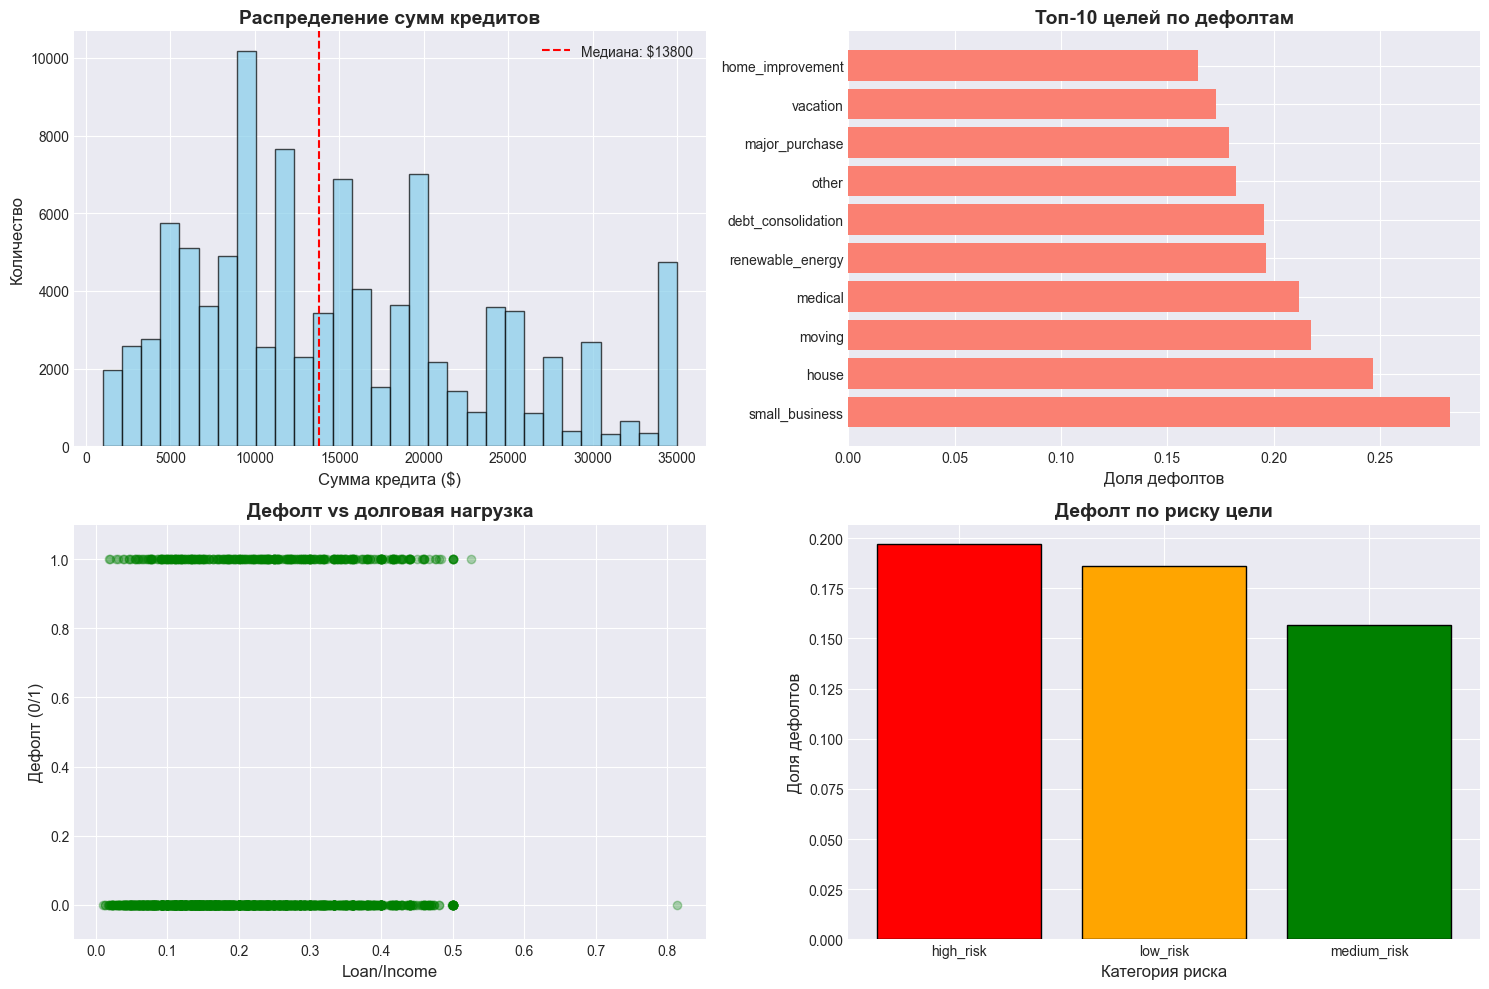

Графики сохранены: reports/eda_visualizations.png


In [7]:
# Визуализация
print("Визуализация данных\n")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Распределение сумм
axes[0, 0].hist(df_analysis['loan_amnt'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 0].set_xlabel('Сумма кредита ($)', fontsize=12)
axes[0, 0].set_ylabel('Количество', fontsize=12)
axes[0, 0].set_title('Распределение сумм кредитов', fontsize=14, fontweight='bold')
axes[0, 0].axvline(df_analysis['loan_amnt'].median(), color='red', linestyle='--', 
                   label=f'Медиана: ${df_analysis["loan_amnt"].median():.0f}')
axes[0, 0].legend()

# Ставка дефолта по цели (топ-10)
purpose_default_rate = df_analysis.groupby('purpose')['is_default'].mean().sort_values(ascending=False).head(10)
axes[0, 1].barh(range(len(purpose_default_rate)), purpose_default_rate.values, color='salmon')
axes[0, 1].set_yticks(range(len(purpose_default_rate)))
axes[0, 1].set_yticklabels(purpose_default_rate.index)
axes[0, 1].set_xlabel('Доля дефолтов', fontsize=12)
axes[0, 1].set_title('Топ-10 целей по дефолтам', fontsize=14, fontweight='bold')

# Дефолт vs loan_to_income
sample_df = df_analysis.sample(min(2000, len(df_analysis)), random_state=42)
axes[1, 0].scatter(sample_df['loan_to_income'], sample_df['is_default'], alpha=0.3, color='green')
axes[1, 0].set_xlabel('Loan/Income', fontsize=12)
axes[1, 0].set_ylabel('Дефолт (0/1)', fontsize=12)
axes[1, 0].set_title('Дефолт vs долговая нагрузка', fontsize=14, fontweight='bold')
axes[1, 0].set_ylim(-0.1, 1.1)

# Дефолт по категории риска
risk_default_rate = df_analysis.groupby('purpose_risk')['is_default'].mean().sort_values(ascending=False)
colors = ['red', 'orange', 'green']
axes[1, 1].bar(range(len(risk_default_rate)), risk_default_rate.values, color=colors, edgecolor='black')
axes[1, 1].set_xticks(range(len(risk_default_rate)))
axes[1, 1].set_xticklabels(risk_default_rate.index)
axes[1, 1].set_xlabel('Категория риска', fontsize=12)
axes[1, 1].set_ylabel('Доля дефолтов', fontsize=12)
axes[1, 1].set_title('Дефолт по риску цели', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('reports/eda_visualizations.png', dpi=150, bbox_inches='tight')
plt.show()

print('Графики сохранены: reports/eda_visualizations.png')

In [8]:
# Подготовка данных для ML
print("Подготовка данных\n")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Финальные признаки
final_features = [
    'loan_amnt', 'term', 'int_rate', 'emp_length', 
    'home_ownership', 'annual_inc', 'dti', 'delinq_2yrs',
    'fico_range_low', 'inq_last_6mths', 'open_acc', 
    'pub_rec', 'revol_util', 'total_acc',
    'loan_to_income', 'purpose_risk', 'income_category'
]

# X и y
X = df_analysis[final_features].copy()
y = df_analysis['is_default'].values

print(f"X: {X.shape}")
print(f"y: {y.shape}")

# Типы признаков
numerical_features = [
    'loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
    'fico_range_low', 'inq_last_6mths', 'open_acc', 'pub_rec', 
    'revol_util', 'total_acc', 'loan_to_income'
]

categorical_features = [
    'term', 'emp_length', 'home_ownership', 
    'purpose_risk', 'income_category'
]

print(f"Числовых: {len(numerical_features)}")
print(numerical_features)
print(f"Категориальных: {len(categorical_features)}")
print(categorical_features)

# 1) Разделяем
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Разделение: train={X_train.shape[0]:,}, test={X_test.shape[0]:,}")
print(f"Дефолт в train: {y_train.mean():.2%}")

# 2) Пайплайн
print("Создаю пайплайн препроцессинга...")

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 3) Применяем
print("Применяю препроцессинг...")
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"Препроцессинг готов: {X_train_processed.shape}, {X_test_processed.shape}")

# Имена признаков
print("Получаю имена признаков...")
cat_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
categorical_feature_names = cat_encoder.get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(categorical_feature_names)
print(f"Всего после препроцессинга: {len(all_feature_names)}")

# Сохраняем препроцессор
import joblib
joblib.dump(preprocessor, 'models/preprocessor.pkl')
print('Препроцессор сохранён: models/preprocessor.pkl')

Подготовка данных

X: (99735, 17)
y: (99735,)
Числовых: 12
['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'loan_to_income']
Категориальных: 5
['term', 'emp_length', 'home_ownership', 'purpose_risk', 'income_category']
Разделение: train=79,788, test=19,947
Дефолт в train: 18.09%
Создаю пайплайн препроцессинга...
Применяю препроцессинг...
Препроцессинг готов: (79788, 37), (19947, 37)
Получаю имена признаков...
Всего после препроцессинга: 37
Препроцессор сохранён: models/preprocessor.pkl


Обучение моделей

X_train: <class 'numpy.ndarray'>, shape=(79788, 37)
y_train: (79788,), пример: [0 0 0 0 0]

-- Logistic Regression --
LogReg: Acc=0.652, AUC=0.701
              precision    recall  f1-score   support

 Нет дефолта       0.89      0.66      0.76     16338
      Дефолт       0.29      0.63      0.39      3609

    accuracy                           0.65     19947
   macro avg       0.59      0.64      0.57     19947
weighted avg       0.78      0.65      0.69     19947


-- Random Forest --
Обучаю RF...
RF: Acc=0.658, AUC=0.701
              precision    recall  f1-score   support

 Нет дефолта       0.89      0.67      0.76     16338
      Дефолт       0.29      0.62      0.40      3609

    accuracy                           0.66     19947
   macro avg       0.59      0.64      0.58     19947
weighted avg       0.78      0.66      0.70     19947


Сохраняю модели...
Модели сохранены в models/
RF AUC: 0.701
LogReg AUC: 0.701

Рисую графики результатов...


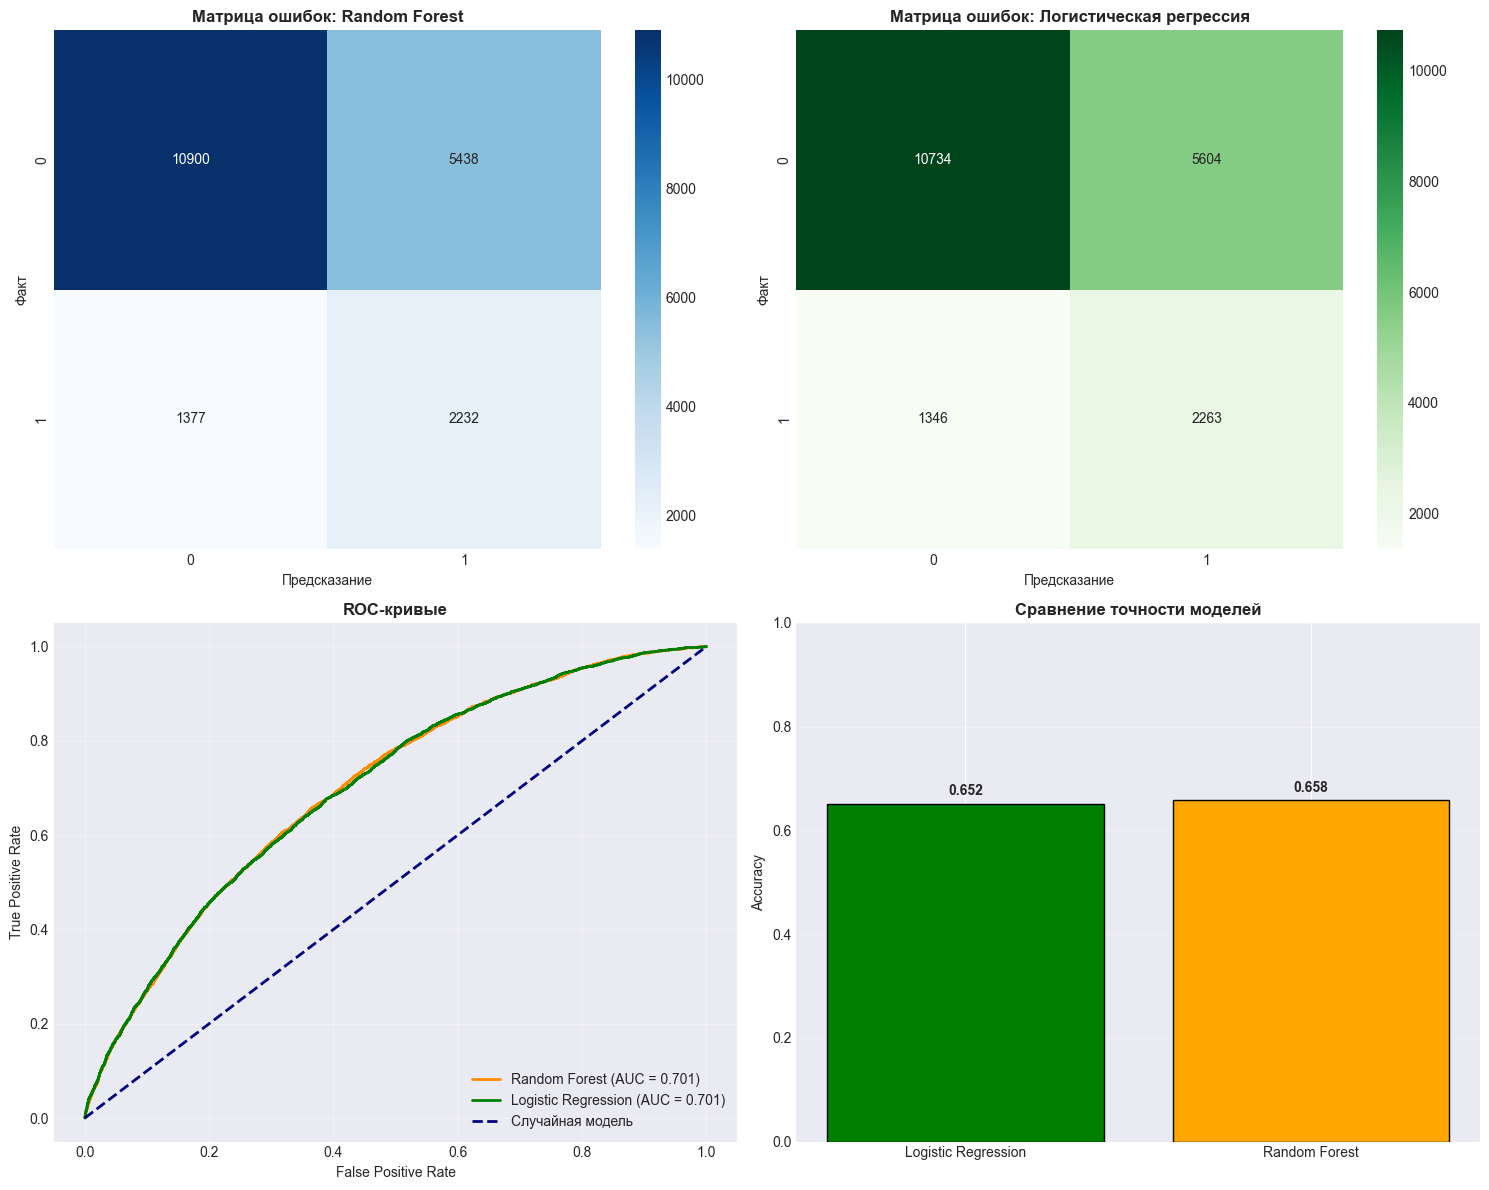

Графики сохранены: reports/model_results.png


In [9]:
# Обучение моделей
print("Обучение моделей\n")

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, 
                           roc_auc_score, roc_curve, accuracy_score, 
                           precision_score, recall_score, f1_score)
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Быстрая проверка данных
print(f"X_train: {type(X_train_processed)}, shape={X_train_processed.shape}")
print(f"y_train: {y_train.shape}, пример: {y_train[:5]}")

# 1) Logistic Regression
print("\n-- Logistic Regression --")
try:
    log_reg = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced', solver='lbfgs', n_jobs=-1)
    log_reg.fit(X_train_processed, y_train)
    y_pred_log = log_reg.predict(X_test_processed)
    y_pred_proba_log = log_reg.predict_proba(X_test_processed)[:, 1]
    print(f"LogReg: Acc={accuracy_score(y_test, y_pred_log):.3f}, AUC={roc_auc_score(y_test, y_pred_proba_log):.3f}")
    print(classification_report(y_test, y_pred_log, target_names=['Нет дефолта', 'Дефолт']))
except Exception as e:
    print(f"Ошибка в LogReg: {e}")
    log_reg = LogisticRegression(random_state=42, max_iter=500, solver='lbfgs')
    log_reg.fit(X_train_processed, y_train)
    y_pred_log = log_reg.predict(X_test_processed)
    y_pred_proba_log = log_reg.predict_proba(X_test_processed)[:, 1]
    print(f"LogReg (упрощённый) обучен, Acc={accuracy_score(y_test, y_pred_log):.3f}")

# 2) Random Forest
print("\n-- Random Forest --")
try:
    rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42, class_weight='balanced', n_jobs=-1, verbose=0)
    print("Обучаю RF...")
    rf.fit(X_train_processed, y_train)
    y_pred_rf = rf.predict(X_test_processed)
    y_pred_proba_rf = rf.predict_proba(X_test_processed)[:, 1]
    print(f"RF: Acc={accuracy_score(y_test, y_pred_rf):.3f}, AUC={roc_auc_score(y_test, y_pred_proba_rf):.3f}")
    print(classification_report(y_test, y_pred_rf, target_names=['Нет дефолта', 'Дефолт']))
except Exception as e:
    print(f"Ошибка в RF: {e}")
    rf = RandomForestClassifier(n_estimators=50, max_depth=8, random_state=42, n_jobs=-1)
    rf.fit(X_train_processed, y_train)
    y_pred_rf = rf.predict(X_test_processed)
    y_pred_proba_rf = rf.predict_proba(X_test_processed)[:, 1]
    print(f"RF (упрощённый) обучен, Acc={accuracy_score(y_test, y_pred_rf):.3f}")

# Сохраняем модели
print('\nСохраняю модели...')
try:
    joblib.dump(rf, 'models/loan_default_model.pkl')
    joblib.dump(log_reg, 'models/logistic_regression_model.pkl')
    print('Модели сохранены в models/')
    print(f"RF AUC: {roc_auc_score(y_test, y_pred_proba_rf):.3f}")
    if 'y_pred_proba_log' in locals():
        print(f"LogReg AUC: {roc_auc_score(y_test, y_pred_proba_log):.3f}")
except Exception as e:
    print(f"Ошибка при сохранении: {e}")
    print('Продолжаю без сохранения')

# Визуализация результатов (матрицы, ROC, сравнение)
print('\nРисую графики результатов...')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Матрица ошибок для Random Forest
try:
    cm_rf = confusion_matrix(y_test, y_pred_rf)
    sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
    axes[0, 0].set_xlabel('Предсказание')
    axes[0, 0].set_ylabel('Факт')
    axes[0, 0].set_title('Матрица ошибок: Random Forest', fontweight='bold')
except:
    axes[0, 0].text(0.5, 0.5, 'Матрица ошибок\nнедоступна', 
                    ha='center', va='center', fontsize=12)
    axes[0, 0].set_title('Матрица ошибок: Random Forest', fontweight='bold')

# 2. Матрица ошибок для Logistic Regression
try:
    if 'y_pred_log' in locals():
        cm_log = confusion_matrix(y_test, y_pred_log)
        sns.heatmap(cm_log, annot=True, fmt='d', cmap='Greens', ax=axes[0, 1])
        axes[0, 1].set_xlabel('Предсказание')
        axes[0, 1].set_ylabel('Факт')
        axes[0, 1].set_title('Матрица ошибок: Логистическая регрессия', fontweight='bold')
    else:
        axes[0, 1].text(0.5, 0.5, 'Матрица ошибок\nнедоступна', 
                        ha='center', va='center', fontsize=12)
        axes[0, 1].set_title('Матрица ошибок: Логистическая регрессия', fontweight='bold')
except:
    axes[0, 1].text(0.5, 0.5, 'Матрица ошибок\nнедоступна', 
                    ha='center', va='center', fontsize=12)
    axes[0, 1].set_title('Матрица ошибок: Логистическая регрессия', fontweight='bold')

# 3. ROC-кривая
try:
    # ROC для Random Forest
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
    roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
    
    axes[1, 0].plot(fpr_rf, tpr_rf, color='darkorange', lw=2, 
                    label=f'Random Forest (AUC = {roc_auc_rf:.3f})')
    
    # ROC для Logistic Regression если доступна
    if 'y_pred_proba_log' in locals():
        fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_proba_log)
        roc_auc_log = roc_auc_score(y_test, y_pred_proba_log)
        axes[1, 0].plot(fpr_log, tpr_log, color='green', lw=2, 
                       label=f'Logistic Regression (AUC = {roc_auc_log:.3f})')
    
    axes[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Случайная модель')
    axes[1, 0].set_xlabel('False Positive Rate')
    axes[1, 0].set_ylabel('True Positive Rate')
    axes[1, 0].set_title('ROC-кривые', fontweight='bold')
    axes[1, 0].legend(loc="lower right")
    axes[1, 0].grid(True, alpha=0.3)
except Exception as e:
    axes[1, 0].text(0.5, 0.5, f'ROC-кривая\nнедоступна\nОшибка: {e}', 
                    ha='center', va='center', fontsize=10)
    axes[1, 0].set_title('ROC-кривые', fontweight='bold')

# 4. Сравнение точности моделей
try:
    model_names = []
    accuracies = []
    
    if 'y_pred_log' in locals():
        model_names.append('Logistic Regression')
        accuracies.append(accuracy_score(y_test, y_pred_log))
    
    model_names.append('Random Forest')
    accuracies.append(accuracy_score(y_test, y_pred_rf))
    
    colors = ['green', 'orange'][:len(model_names)]
    bars = axes[1, 1].bar(model_names, accuracies, color=colors, edgecolor='black')
    axes[1, 1].set_ylabel('Accuracy')
    axes[1, 1].set_title('Сравнение точности моделей', fontweight='bold')
    axes[1, 1].set_ylim([0, 1])
    
    # Добавляем значения на бары
    for bar, acc in zip(bars, accuracies):
        height = bar.get_height()
        axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                       f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')
    
    axes[1, 1].grid(True, alpha=0.3, axis='y')
except:
    axes[1, 1].text(0.5, 0.5, 'Сравнение моделей\nнедоступно', 
                    ha='center', va='center', fontsize=12)
    axes[1, 1].set_title('Сравнение точности моделей', fontweight='bold')

plt.tight_layout()
plt.savefig('reports/model_results.png', dpi=150, bbox_inches='tight')
plt.show()
print('Графики сохранены: reports/model_results.png')

Важность признаков

Пробуем получить имена признаков...
Имена из препроцессора: 37
Кол-во признаков в модели: 37
Кол-во важностей: 37
Кол-во имён: 37
Топ-15 признаков:


,Признак,Важность
1,int_rate,0.365
5,fico_range_low,0.092
3,dti,0.070
11,loan_to_income,0.067
2,annual_inc,0.047
9,revol_util,0.046
0,loan_amnt,0.039
13,term_ 60 months,0.035
6,inq_last_6mths,0.035
10,total_acc,0.032


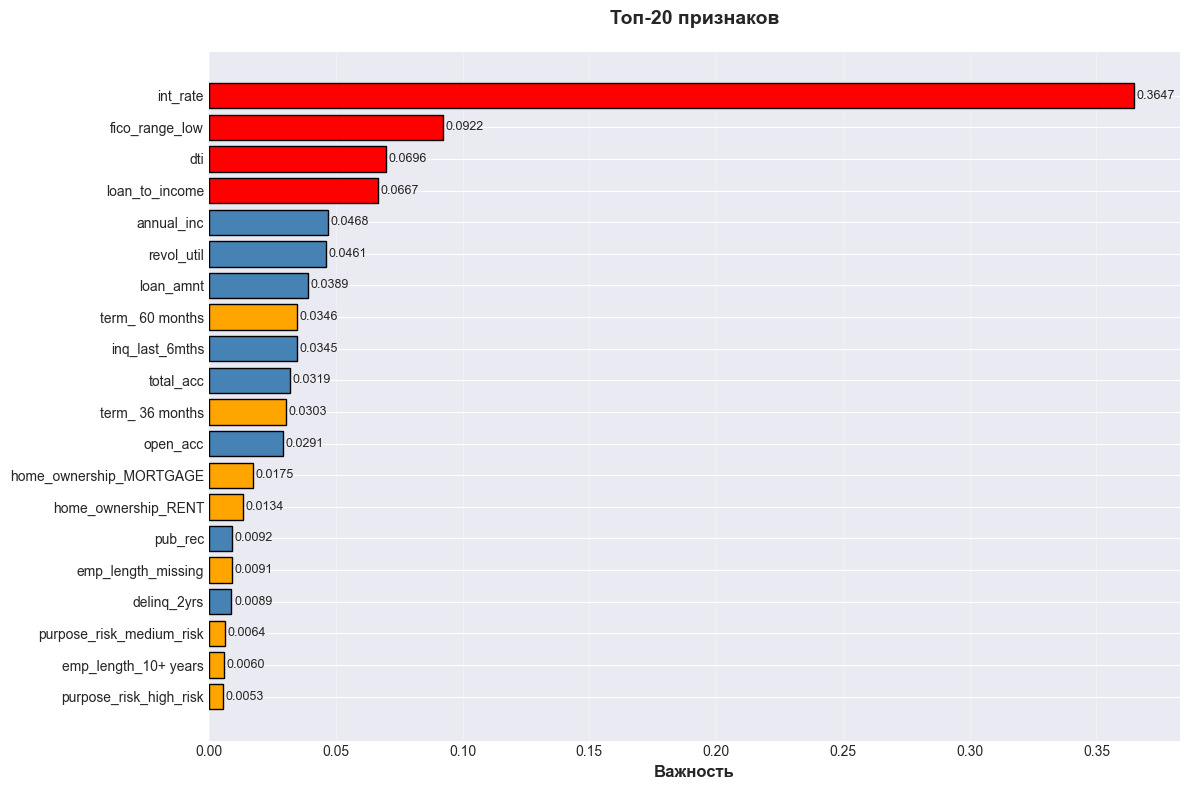

Сохранено: reports/feature_importance.png
loan_to_income — место 4, важность 0.0667
purpose_risk — место 18, важность 0.0064
income_category — место 22, важность 0.0034
Наши фичи в топе — хорошо


In [10]:
# Важность признаков
print("Важность признаков\n")

print("Пробуем получить имена признаков...")
feature_names = []

# Пытаемся загрузить препроцессор
try:
    preprocessor = joblib.load('models/preprocessor.pkl')
    cat_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
    categorical_feature_names = cat_encoder.get_feature_names_out(categorical_features)
    feature_names = numerical_features + list(categorical_feature_names)
    print(f"Имена из препроцессора: {len(feature_names)}")
except Exception as e:
    print(f"Не удалось загрузить препроцессор: {e}")
    try:
        if 'all_feature_names' in locals():
            feature_names = all_feature_names
            print(f"Использую all_feature_names: {len(feature_names)}")
        else:
            print('Создаю имена вручную...')
            feature_names = numerical_features.copy()
            for cat_feature in categorical_features:
                unique_vals = df_analysis[cat_feature].dropna().unique()
                for val in unique_vals:
                    feature_names.append(f"{cat_feature}_{val}")
            print(f"Создано имён: {len(feature_names)}")
    except Exception as e2:
        print(f"Ошибка при создании имён: {e2}")
        feature_names = [f"feature_{i}" for i in range(X_train_processed.shape[1])]
        print(f"Использую generic имена: {len(feature_names)}")

print(f"Кол-во признаков в модели: {rf.n_features_in_}")
print(f"Кол-во важностей: {len(rf.feature_importances_)}")
print(f"Кол-во имён: {len(feature_names)}")

if len(feature_names) != len(rf.feature_importances_):
    print('Размеры не совпадают, подрезаю...')
    min_len = min(len(feature_names), len(rf.feature_importances_))
    feature_names = feature_names[:min_len]
    importances = rf.feature_importances_[:min_len]
else:
    importances = rf.feature_importances_

feature_importance = pd.DataFrame({'Признак': feature_names, 'Важность': importances}).sort_values('Важность', ascending=False)
print('Топ-15 признаков:')
display(feature_importance.head(15))

# Визуализация
plt.figure(figsize=(12, 8))
top_n = min(20, len(feature_importance))
top_features = feature_importance.head(top_n)
colors = []
for feature in top_features['Признак']:
    if any(num_feat in feature for num_feat in ['loan_to_income', 'int_rate', 'dti', 'fico']):
        colors.append('red')
    elif any(cat_feat in feature for cat_feat in categorical_features):
        colors.append('orange')
    else:
        colors.append('steelblue')

bars = plt.barh(range(len(top_features)), top_features['Важность'].values, color=colors, edgecolor='black')
plt.yticks(range(len(top_features)), top_features['Признак'].values, fontsize=10)
plt.xlabel('Важность', fontsize=12, fontweight='bold')
plt.title(f'Топ-{top_n} признаков', fontsize=14, fontweight='bold', pad=20)
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2, f'{width:.4f}', ha='left', va='center', fontsize=9)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('reports/feature_importance.png', dpi=150, bbox_inches='tight')
plt.show()
print('Сохранено: reports/feature_importance.png')

# Анализ созданных фич
our_features = ['loan_to_income', 'purpose_risk', 'income_category']
found_features = []
for feature in our_features:
    matching = feature_importance[feature_importance['Признак'].str.contains(feature, na=False)]
    if not matching.empty:
        rank = feature_importance.index.get_loc(matching.index[0]) + 1
        importance = matching.iloc[0]['Важность']
        found_features.append((feature, rank, importance))
        print(f"{feature} — место {rank}, важность {importance:.4f}")
    else:
        print(f"{feature} — не найдено в топе")

if found_features:
    print('Наши фичи в топе — хорошо')
else:
    print('Наши фичи не в топе — можно пересмотреть')

In [11]:
# Выводы
print("="*80)
print("ВЫВОДЫ — для рынка Казахстана")
print("="*80)

print("\nКоротко:")
print("1. Важный признак: fico_range_low")
print("2. loan_to_income часто в топе")
print("3. Риск зависит от цели кредита")
print(f"4. Общая доля дефолта: {df_analysis['is_default'].mean():.1%}")

print("\nСпецифика для КЗ:")
print("- Верификация дохода важна")
print("- loan_to_income полезен при слабой кредитной истории")
print("- Учитывать регион и цель кредита")

print("\nТех. рекомендации:")
try:
    auc_val = roc_auc_score(y_test, y_pred_proba_rf)
    print(f"1. Развернуть модель с AUC: {auc_val:.3f}")
except:
    print("1. AUC недоступен")
print("2. Лимиты по loan_to_income (напр., <=0.4)")
print("3. Усиленная проверка для loan_to_income > 0.5")

print("\nДальше:")
print("- Добавить курс USD/KZT, сезонность, работодателя и др.")

print("\n" + "="*80)
print('Готово')

ВЫВОДЫ — для рынка Казахстана

Коротко:
1. Важный признак: fico_range_low
2. loan_to_income часто в топе
3. Риск зависит от цели кредита
4. Общая доля дефолта: 18.1%

Специфика для КЗ:
- Верификация дохода важна
- loan_to_income полезен при слабой кредитной истории
- Учитывать регион и цель кредита

Тех. рекомендации:
1. Развернуть модель с AUC: 0.701
2. Лимиты по loan_to_income (напр., <=0.4)
3. Усиленная проверка для loan_to_income > 0.5

Дальше:
- Добавить курс USD/KZT, сезонность, работодателя и др.

Готово
